In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# Loading dataset and visulisation

In [6]:
data=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

In [7]:
#shape of data
data.shape

(13636, 15)

In [8]:
data.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [9]:
data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [11]:
data['Rating'].unique()

array([5, 3, 4, 0, 2, 1])

In [12]:
data['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

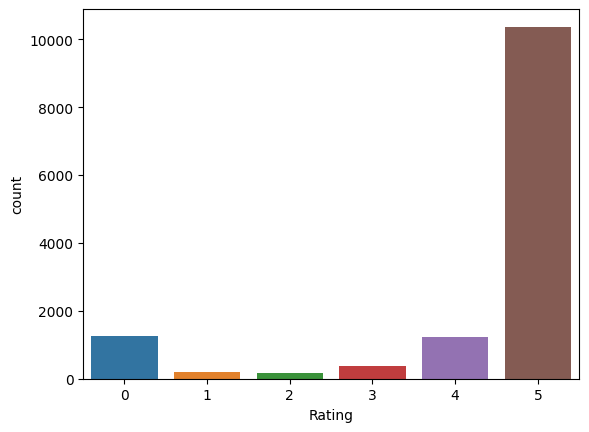

In [13]:
import seaborn as sns
sns.countplot(x='Rating',data=data)

# Checking NULL Values

In [14]:
data.isnull().sum()  #checking null values

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [15]:
data=data.fillna(0)    #replacing null values with 0  

In [16]:
data.duplicated().sum()   #checking for duplicates

0

# Plotting Correlation Heat Map

In [17]:
numeric_features =['BestScore','RecipeNumber','ThumbsUpCount','ThumbsDownCount','UserReputation','ReplyCount','Rating']
corre= data[numeric_features].corr()

<Axes: >

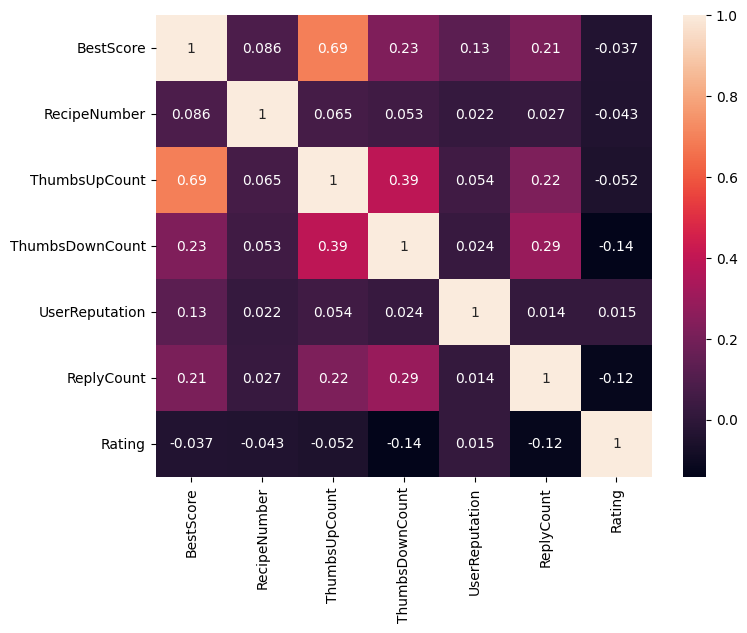

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(corre,annot= True,xticklabels = True,yticklabels = True)


In [19]:
data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


# Using label encoder for converting RecipeName into numerical variable

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
data["RecipeName"]=encoder.fit_transform(data["RecipeName"])
RecipeName_no={ index: label for index, label in enumerate(encoder.classes_)}
RecipeName_no

{0: 'Amish Breakfast Casserole',
 1: 'Apple Pie',
 2: 'Asian Chicken Thighs',
 3: 'Bacon Macaroni Salad',
 4: 'Baked Mushroom Chicken',
 5: 'Baked Spaghetti',
 6: 'Baked Tilapia',
 7: 'Banana Bars with Cream Cheese Frosting',
 8: 'Basic Banana Muffins',
 9: 'Basic Homemade Bread',
 10: 'Best Ever Banana Bread',
 11: 'Best Ever Potato Soup',
 12: 'Big Soft Ginger Cookies',
 13: 'Black Bean ‘n’ Pumpkin Chili',
 14: 'Blueberry French Toast',
 15: 'Brown Sugar Oatmeal Pancakes',
 16: 'Bruschetta Chicken',
 17: 'Buttery Cornbread',
 18: 'Caramel Heavenlies',
 19: 'Caramel-Pecan Cheesecake Pie',
 20: 'Cauliflower Soup',
 21: 'Cheeseburger Paradise Soup',
 22: 'Cheeseburger Soup',
 23: 'Cheesy Ham Chowder',
 24: 'Cherry Bars',
 25: 'Chicken Penne Casserole',
 26: 'Chicken Wild Rice Soup',
 27: 'Chicken and Dumplings',
 28: 'Chocolate Caramel Candy',
 29: 'Chocolate Chip Oatmeal Cookies',
 30: 'Chocolate Guinness Cake',
 31: 'Chocolate-Strawberry Celebration Cake',
 32: 'Chunky Apple Cake',
 3

#  Dropping Irrelevent Columns

In [21]:
irrelevent_columns=['CommentID','UserName','UserID','CreationTimestamp']
data=data.drop(columns=irrelevent_columns)

In [22]:
data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,7,20,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,83,1,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,22,1,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,55,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,20,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


# Dealing with text data

In [23]:
#Lowercasing
import string
data['Recipe_Review']=data['Recipe_Review'].str.lower() 
data['Recipe_Review'].head()

0    great recipe! i have made them just as written...
1    this is an easy and quick recipe that is great...
2    i think i was looking for something extra spec...
3    this is our favorite grilled chicken recipe.  ...
4    great basic recipe. i added 2 teaspoons tuscan...
Name: Recipe_Review, dtype: object

Now dealing with punctuation special characters(@#$%&*) and Links 

In [24]:
data['Recipe_Review'][6356]

'good &lt;a href=&#34;https://scoopkeeda.com/video-banane-wala-apps-download/&#34; target=&#34;_blank&#34;&gt;information&lt;/a&gt; i need deep recipe about this'

In [25]:
import re
def clean_text(text):
    # Check if the input is a non-string (e.g., NaN)
    if not isinstance(text, str):
        return ''
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove non-alphabetic characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    return text

data['Recipe_Review'] = data['Recipe_Review'].apply(clean_text)

In [26]:
data['Recipe_Review'][6356]

'good lta href targetblankgtinformationltagt i need deep recipe about this'

# Splitting Dataset into train and test data

In [27]:
X=data.drop('Rating', axis=1)
y=data['Rating']
X.shape, y.shape

((13636, 10), (13636,))

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)
X_train.shape, X_test.shape

((9545, 10), (4091, 10))

In [30]:
X_train_num=X_train.drop('Recipe_Review',axis=1)
X_test_num=X_test.drop('Recipe_Review',axis=1)

# Scaling Numerical Features

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_num_ss = pd.DataFrame( ss.fit_transform(X_train_num),columns=X_train_num.columns )
X_test_num_ss = pd.DataFrame( ss.transform(X_test_num),columns=X_test_num.columns )
X_train_num_ss.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
0,-1.027904,-0.223348,-0.183759,1.127201,-0.107919,-0.104545,-0.024736,1.945688,2.709393
1,-0.838105,-1.134655,0.879311,0.919366,-0.107919,-0.104545,-0.258968,-0.166297,-0.374821
2,-0.027142,1.363003,0.486531,-0.639402,-0.107919,-0.104545,-0.258968,-0.166297,-0.374821
3,-0.976141,-1.269664,-0.311407,-0.293010,-0.107919,-0.104545,6.299530,0.437127,5.220622
4,-0.441250,0.586704,0.255654,0.676891,-0.107919,-0.104545,-0.258968,-0.166297,-0.374821


In [32]:
X_train_txt=X_train['Recipe_Review']
X_test_txt=X_test['Recipe_Review']
X_train_txt

2651     can you freeze both a cooked one due to leftov...
6088     this recipe is absolute perfection i brought t...
12824    use fat free butter and fat free and sugar fre...
7438     this is delicious and i make it often one such...
6427     i first made this recipe years ago when it was...
                               ...                        
5191                           my family loved this recipe
13418    simple and what is there not to love about cho...
5390     absolutely love it my family loved it it was a...
860      its not even finished yet n it already smells ...
7270     i used a four cheese mexican blend and cubed t...
Name: Recipe_Review, Length: 9545, dtype: object

# Converting text data into numerical data

In [33]:
#Using Count Vectorizer

#from sklearn.feature_extraction.text import CountVectorizer
#count_vec=CountVectorizer(stop_words='english')
#X_train_txt_cvec=count_vec.fit_transform(X_train_txt)
#X_test_txt_cvec=count_vec.transform(X_test_txt)
#X_train_txt_cvec

In [34]:
#Using TF- IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_txt_vec=vectorizer.fit_transform(X_train_txt)
X_test_txt_vec=vectorizer.transform(X_test_txt)
X_train_txt_vec

<9545x10377 sparse matrix of type '<class 'numpy.float64'>'
	with 269484 stored elements in Compressed Sparse Row format>

# Combining both text data and numerical data

In [35]:
X_train_combined = np.hstack([X_train_num_ss,X_train_txt_vec.toarray()] )
X_test_combined = np.hstack([X_test_num_ss,X_test_txt_vec.toarray()] )
X_train_combined.shape

(9545, 10386)

# Model Building

***Logistic Regression (Without HyperParameter)***

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_combined,y_train)

LogisticRegression(max_iter=1000)

In [32]:
print('Training Score:',model.score(X_train_combined,y_train)) 

Training Score: 0.8147721320062861


In [33]:
y_pred = model.predict(X_test_combined) 
print('Testing Score:',model.score(X_test_combined,y_test))

Testing Score: 0.7604497677829382


              precision    recall  f1-score   support

           0       0.40      0.10      0.16       393
           1       0.53      0.12      0.20        67
           2       0.29      0.04      0.07        53
           3       0.41      0.10      0.16       122
           4       0.37      0.10      0.16       392
           5       0.78      0.98      0.87      3064

    accuracy                           0.76      4091
   macro avg       0.46      0.24      0.27      4091
weighted avg       0.69      0.76      0.69      4091



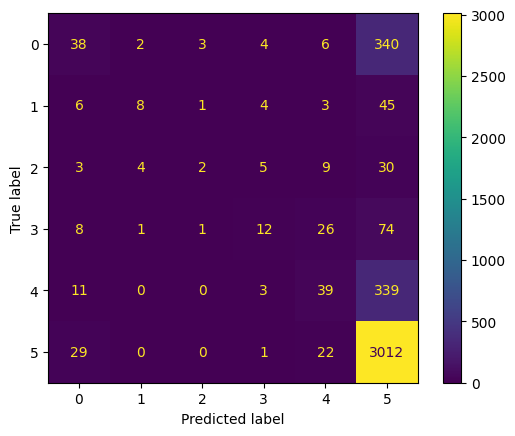

In [34]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

***RandomForest Classsifier(without Hyperparameter)***

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_combined,y_train)

RandomForestClassifier()

In [37]:
print('Traning Score:', rfc.score(X_train_combined,y_train))

Traning Score: 1.0


In [39]:
y_pred = rfc.predict(X_test_combined) 
print('Testing Score:',rfc.score(X_test_combined,y_test))

Testing Score: 0.7538499144463456


              precision    recall  f1-score   support

           0       0.58      0.05      0.08       393
           1       0.50      0.01      0.03        67
           2       1.00      0.02      0.04        53
           3       1.00      0.01      0.02       122
           4       0.67      0.02      0.04       392
           5       0.76      1.00      0.86      3064

    accuracy                           0.75      4091
   macro avg       0.75      0.18      0.18      4091
weighted avg       0.74      0.75      0.66      4091



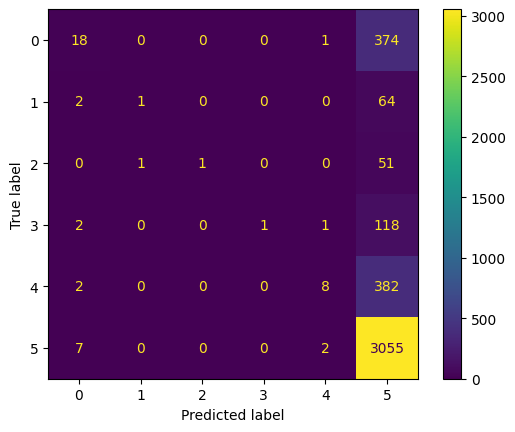

In [41]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# Test Data

In [35]:
test=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")

In [36]:
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [37]:
#label encoder
test["RecipeName"]=encoder.transform(test["RecipeName"])

In [38]:
#dropping irrelevent columns
test=test.drop(columns=irrelevent_columns)

In [39]:
#Lowercasing
test['Recipe_Review']=test['Recipe_Review'].str.lower() 
test['Recipe_Review'].head()

0    this was so good!!  the pumpkin was perfect as...
1    so good!   could not stop eating them, so bad....
2             i use a small ladle to fill muffin cups.
3    i made this and followed the instructions as d...
4    very good!  i used corn tortillas.  used fresh...
Name: Recipe_Review, dtype: object

In [40]:
# Removing punctuation and Links
test['Recipe_Review'] = test['Recipe_Review'].apply(clean_text)
test['Recipe_Review']

0       this was so good  the pumpkin was perfect as a...
1       so good   could not stop eating them so bad   ...
2                 i use a small ladle to fill muffin cups
3       i made this and followed the instructions as d...
4       very good  i used corn tortillas  used fresh c...
                              ...                        
4541    this is an absolutely wonderful seafood recipe...
4542    this us a definite omg  tastes sinful and a lo...
4543    absolutely greateven husband and grandson love...
4544    i followed directions it tastes very bland ver...
4545    after reading the amazing reviews i decided to...
Name: Recipe_Review, Length: 4546, dtype: object

In [41]:
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,13,1,0,0,0,100,this was so good the pumpkin was perfect as a...
1,102,53,3143,72,1,0,0,1,100,so good could not stop eating them so bad ...
2,156,53,3143,72,1,0,0,0,100,i use a small ladle to fill muffin cups
3,18,89,1324,70,1,0,4,3,212,i made this and followed the instructions as d...
4,27,70,32264,40,1,0,0,1,100,very good i used corn tortillas used fresh c...


In [42]:
test_num=test.drop('Recipe_Review', axis=1)
test_txt=test['Recipe_Review']

In [43]:
test_num

,ID,RecipeNumber,RecipeCode,RecipeName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
0,86,45,41384,13,1,0,0,0,100
1,102,53,3143,72,1,0,0,1,100
2,156,53,3143,72,1,0,0,0,100
3,18,89,1324,70,1,0,4,3,212
4,27,70,32264,40,1,0,0,1,100
...,...,...,...,...,...,...,...,...,...
4541,152,32,17310,80,1,0,0,0,100
4542,121,74,26937,69,1,0,0,0,100
4543,133,73,41095,34,1,0,0,0,100
4544,91,12,19731,20,1,0,0,1,100


In [44]:
# Scaling 
test_num_ss=pd.DataFrame( ss.transform(test_num),columns=test_num.columns )
test_num_ss

,ID,RecipeNumber,RecipeCode,RecipeName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
0,-0.294587,0.215430,0.836832,-1.193631,-0.107919,-0.104545,-0.258968,-0.166297,-0.374821
1,-0.156551,0.485447,-0.784354,0.850087,-0.107919,-0.104545,-0.258968,0.135415,-0.374821
2,0.309322,0.485447,-0.784354,0.850087,-0.107919,-0.104545,-0.258968,-0.166297,-0.374821
3,-0.881241,1.700524,-0.861468,0.780808,-0.107919,-0.104545,0.677960,0.738839,0.417454
4,-0.803595,1.059234,0.450199,-0.258370,-0.107919,-0.104545,-0.258968,0.135415,-0.374821
...,...,...,...,...,...,...,...,...,...
4541,0.274812,-0.223348,-0.183759,1.127201,-0.107919,-0.104545,-0.258968,-0.166297,-0.374821
4542,0.007367,1.194242,0.224367,0.746169,-0.107919,-0.104545,-0.258968,-0.166297,-0.374821
4543,0.110894,1.160490,0.824580,-0.466206,-0.107919,-0.104545,-0.258968,-0.166297,-0.374821
4544,-0.251451,-0.898390,-0.081124,-0.951156,-0.107919,-0.104545,-0.258968,0.135415,-0.374821


In [45]:
# converting text data into number

test_txt_vec=vectorizer.transform(test_txt)
test_txt_vec

<4546x10377 sparse matrix of type '<class 'numpy.float64'>'
	with 125990 stored elements in Compressed Sparse Row format>

In [46]:
#combining both text and numerical data
test_combined=np.hstack([test_num_ss,test_txt_vec.toarray()] )
test_combined.shape

(4546, 10386)

In [47]:
prediction=model.predict(test_combined)
prediction

array([5, 5, 5, ..., 5, 1, 5])

In [48]:
submission=pd.DataFrame({'ID': range(1,4547),
                         'Rating': prediction})

submission.to_csv("submission.csv", index=False)

In [49]:
submission["Rating"].value_counts()

Rating
5    4308
4     100
0      92
3      22
1      21
2       3
Name: count, dtype: int64